In [5]:
# pip install pandas

In [6]:
import pandas as pd

In [7]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [8]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [9]:
# 'Royal Challengers Bangalore' -> 'Royal Challengers Bengaluru'
# 'Kings XI Punjab' -> 'Punjab Kings'
# 'Delhi Daredevils' -> 'Delhi Capitals'
# 'Deccan Chargers' -> 'Sunrisers Hyderabad'

teams = [
        'Chennai Super Kings',
        'Royal Challengers Bengaluru',
        'Punjab Kings',
        'Mumbai Indians', 
        'Kolkata Knight Riders',
        'Rajasthan Royals', 
        'Sunrisers Hyderabad',
        'Delhi Capitals', 
        'Lucknow Super Giants', 
        'Gujarat Titans'
       ]

In [10]:
matches['team1'] = matches['team1'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
matches['team2'] = matches['team2'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
matches['winner'] = matches['winner'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

matches['team1'] = matches['team1'].replace('Kings XI Punjab','Punjab Kings')
matches['team2'] = matches['team2'].replace('Kings XI Punjab','Punjab Kings')
matches['winner'] = matches['winner'].replace('Kings XI Punjab','Punjab Kings')

matches['team1'] = matches['team1'].replace('Delhi Daredevils','Delhi Capitals')
matches['team2'] = matches['team2'].replace('Delhi Daredevils','Delhi Capitals')
matches['winner'] = matches['winner'].replace('Delhi Daredevils','Delhi Capitals')

matches['team1'] = matches['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
matches['team2'] = matches['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')
matches['winner'] = matches['winner'].replace('Deccan Chargers','Sunrisers Hyderabad')

matches = matches[matches['team1'].isin(teams)]
matches = matches[matches['team2'].isin(teams)]
matches = matches[matches['winner'].isin(teams)]

In [11]:
deliveries['batting_team'] = deliveries['batting_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

deliveries['batting_team'] = deliveries['batting_team'].replace('Kings XI Punjab','Punjab Kings')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Kings XI Punjab','Punjab Kings')

deliveries['batting_team'] = deliveries['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')

deliveries['batting_team'] = deliveries['batting_team'].replace('Deccan Chargers','Sunrisers Hyderabad')
deliveries['bowling_team'] = deliveries['bowling_team'].replace('Deccan Chargers','Sunrisers Hyderabad')


In [12]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bengaluru', 'Rajasthan Royals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [13]:
matches = matches[['id','city','winner','target_runs']]
matches

,id,city,winner,target_runs
0,335982,Bangalore,Kolkata Knight Riders,223.0
1,335983,Chandigarh,Chennai Super Kings,241.0
2,335984,Delhi,Delhi Capitals,130.0
3,335985,Mumbai,Royal Challengers Bengaluru,166.0
4,335986,Kolkata,Kolkata Knight Riders,111.0
...,...,...,...,...
1090,1426307,Hyderabad,Sunrisers Hyderabad,215.0
1091,1426309,Ahmedabad,Kolkata Knight Riders,160.0
1092,1426310,Ahmedabad,Rajasthan Royals,173.0
1093,1426311,Chennai,Sunrisers Hyderabad,176.0


In [14]:
deliveries = matches.merge(deliveries,left_on='id',right_on='match_id')

In [15]:
deliveries

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,223.0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,223.0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,223.0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,223.0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,223.0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233469,1426312,Chennai,Kolkata Knight Riders,114.0,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,...,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233470,1426312,Chennai,Kolkata Knight Riders,114.0,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,...,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233471,1426312,Chennai,Kolkata Knight Riders,114.0,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,...,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233472,1426312,Chennai,Kolkata Knight Riders,114.0,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,...,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [16]:
deliveries = deliveries[deliveries['inning'] == 2]

In [17]:
deliveries['batting_team'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [18]:
# CS -> Current Score
deliveries['CS'] = deliveries.groupby('match_id')['total_runs'].cumsum()
deliveries

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\2809590553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['CS'] = deliveries.groupby('match_id')['total_runs'].cumsum()


,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,CS
124,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233469,1426312,Chennai,Kolkata Knight Riders,114.0,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110
233470,1426312,Chennai,Kolkata Knight Riders,114.0,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111
233471,1426312,Chennai,Kolkata Knight Riders,114.0,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112
233472,1426312,Chennai,Kolkata Knight Riders,114.0,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113


In [19]:
deliveries['runs_left'] = deliveries['target_runs'] - deliveries['CS'] 

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\2692764023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['runs_left'] = deliveries['target_runs'] - deliveries['CS']


In [20]:
deliveries['balls_left'] = 120 - (deliveries['over']*6 + deliveries['ball'])

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\2871339114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['balls_left'] = 120 - (deliveries['over']*6 + deliveries['ball'])


In [21]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna(0)
deliveries['player_dismissed'] = deliveries['player_dismissed'].apply(lambda x:x if x==0 else 1)
wickets = deliveries.groupby('id')['player_dismissed'].cumsum()
deliveries['wickets_left'] = 10 - wickets

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\835904024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna(0)
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\835904024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['player_dismissed'] = deliveries['player_dismissed'].apply(lambda x:x if x==0 else 1)
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\835904024.py:4: SettingWithCopyWarnin

In [22]:
deliveries['crr'] = round((deliveries['CS']*6) / (120 - deliveries['balls_left']),4)

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\428259640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['crr'] = round((deliveries['CS']*6) / (120 - deliveries['balls_left']),4)


In [23]:
deliveries['rrr'] = round((deliveries['runs_left']*6) / deliveries['balls_left'],4)

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\2633022807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['rrr'] = round((deliveries['runs_left']*6) / deliveries['balls_left'],4)


In [24]:
deliveries.head(5)

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,CS,runs_left,balls_left,wickets_left,crr,rrr
124,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,...,0,0,NaN,NaN,1,222.0,119,10,6.0,11.1933
125,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,...,0,0,NaN,NaN,2,221.0,118,10,6.0,11.2373
126,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,...,0,0,NaN,NaN,2,221.0,117,10,4.0,11.3333
127,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,...,0,0,NaN,NaN,3,220.0,116,10,4.5,11.3793
128,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,...,0,0,NaN,NaN,4,219.0,115,10,4.8,11.4261


In [25]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [26]:
deliveries['result'] = deliveries.apply(result,axis=1)

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\750609322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['result'] = deliveries.apply(result,axis=1)


In [27]:
final_dataset = deliveries[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','target_runs','crr','rrr','result']]
final_dataset

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target_runs,crr,rrr,result
124,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,222.0,119,10,223.0,6.0000,11.1933,0
125,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,221.0,118,10,223.0,6.0000,11.2373,0
126,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,221.0,117,10,223.0,4.0000,11.3333,0
127,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,220.0,116,10,223.0,4.5000,11.3793,0
128,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,219.0,115,10,223.0,4.8000,11.4261,0
...,...,...,...,...,...,...,...,...,...,...
233469,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4.0,61,8,114.0,11.1864,0.3934,1
233470,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3.0,60,8,114.0,11.1000,0.3000,1
233471,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2.0,59,8,114.0,11.0164,0.2034,1
233472,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1.0,58,8,114.0,10.9355,0.1034,1


In [28]:
final_dataset['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [29]:
final_df = final_dataset.sample(final_dataset.shape[0])
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target_runs,crr,rrr,result
179896,Chennai Super Kings,Delhi Capitals,Dubai,102.0,69,9,173.0,8.3529,8.8696,1


In [30]:
final_dataset.dropna(inplace=True)

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\1559558793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.dropna(inplace=True)


In [31]:
final_dataset.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
target_runs     0
crr             0
rrr             0
result          0
dtype: int64

<br><br>
<center><h1>MODEL<h1></center>
<br><br>

In [32]:
# pip install scikit-learn

In [33]:
import numpy as np

final_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

numeric_columns = final_dataset.select_dtypes(include=[np.number]).columns
final_dataset[numeric_columns] = final_dataset[numeric_columns].fillna(final_dataset[numeric_columns].mean())

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\243936671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\243936671.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset[numeric_columns] = final_dataset[numeric_columns].fillna(final_dataset[numeric_columns].mean())


C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\1028136798.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['batting_team'] = label_encode(final_dataset['batting_team'])
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\1028136798.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['bowling_team'] = label_encode(final_dataset['bowling_team'])
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\1028136798.py:43: SettingWithCopyWarning: 
A value i

Accuracy: 0.7690
Winning Percentage: [73.55094123 16.64339636 29.00237631 ... 35.37427083 18.62837283
 43.37143761]
Confusion Matrix:
 [[7574 2746]
 [2185 8845]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75     10320
           1       0.76      0.80      0.78     11030

    accuracy                           0.77     21350
   macro avg       0.77      0.77      0.77     21350
weighted avg       0.77      0.77      0.77     21350

AUC Score: 0.8573


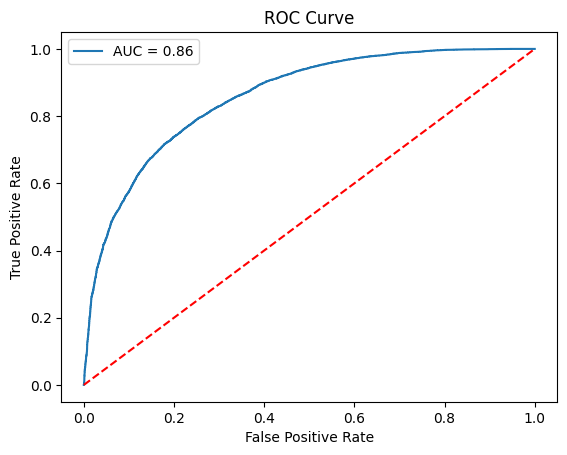

Training Accuracy: 0.7734
Test Accuracy: 0.7690


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta, lambda_reg=0.1):
    m = len(y)
    h = sigmoid(X @ theta)
    regularization = (lambda_reg / (2 * m)) * np.sum(theta[1:] ** 2) 
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + regularization
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations, lambda_reg=0.1):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        gradient[1:] += (lambda_reg / m) * theta[1:]  
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta, lambda_reg)
        cost_history.append(cost)

    return theta, cost_history

def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

def standardize_features(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

def label_encode(column):
    unique_values = sorted(list(set(column)))
    encoding = {value: idx for idx, value in enumerate(unique_values)}
    return np.array([encoding[value] for value in column])

# Assume final_dataset is already loaded as a Pandas DataFrame
final_dataset['batting_team'] = label_encode(final_dataset['batting_team'])
final_dataset['bowling_team'] = label_encode(final_dataset['bowling_team'])
final_dataset['city'] = label_encode(final_dataset['city'])

X = final_dataset[['batting_team', 'bowling_team', 'city', 'runs_left', 
                   'balls_left', 'wickets_left', 'target_runs', 'crr', 'rrr']].values
y = final_dataset['result'].values

X[:, 3:] = standardize_features(X[:, 3:]) 
X = np.hstack((np.ones((X.shape[0], 1)), X))

def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    return X[indices[:split_idx]], X[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

theta = np.zeros(X_train.shape[1])
learning_rate = 0.005
num_iterations = 5000
lambda_reg = 0.1 

theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations, lambda_reg)

y_pred_proba = sigmoid(X_test @ theta)
y_pred = predict(X_test, theta)

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.4f}')

winning_percentage = y_pred_proba * 100
print(f'Winning Percentage: {winning_percentage}')
###
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc:.4f}")
###
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
###
y_train_pred = predict(X_train, theta)
train_accuracy = np.mean(y_train_pred == y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

if train_accuracy - accuracy > 0.05:
    print("Possible Overfitting: Consider increasing lambda_reg.")
elif accuracy < 0.6:
    print("Possible Underfitting: Consider decreasing lambda_reg or increasing iterations.")


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd

final_df = final_dataset.sample(frac=1)
demo = final_df.sample() 

if 'result' in demo.columns:
    print(demo['result'])

demo2 = {}
for column in ['batting_team', 'bowling_team', 'city']:
    le = LabelEncoder()
    final_dataset[column] = le.fit_transform(final_dataset[column]) 
    demo[column] = le.transform(demo[column])
    demo2[column] = le 

X_train = final_dataset.drop(columns=['result']) 
y_train = final_dataset['result'] 

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

demo = demo[X_train.columns]  


y_pred_demo_proba = lr_model.predict_proba(demo)[:, 1]
winning_percentage_demo = y_pred_demo_proba * 100

print(f'Winning Percentage for the sample: {winning_percentage_demo[0]:.2f}%')


214084    1
Name: result, dtype: int64


C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\1701635473.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset[column] = le.fit_transform(final_dataset[column])
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\1701635473.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset[column] = le.fit_transform(final_dataset[column])
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\1701635473.py:14: SettingWithCopyWarning: 
A value is trying to be set on a 

Winning Percentage for the sample: 54.08%


c:\Users\Parth Chhatrala\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
with open('batting_team_encoder', 'wb') as f:
    pickle.dump(lr_model, f)
with open('bowling_team_encoder', 'wb') as f:
    pickle.dump(lr_model, f)
with open('city_encoder', 'wb') as f:
    pickle.dump(lr_model, f)


### Step-5 Experiment with advanced models cross-validation to ensure model stability.

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Preprocessing the Data

In [38]:
encoder = LabelEncoder()
final_dataset['batting_team'] = encoder.fit_transform(final_dataset['batting_team'])
final_dataset['bowling_team'] = encoder.fit_transform(final_dataset['bowling_team'])
final_dataset['city'] = encoder.fit_transform(final_dataset['city'])

X = final_dataset[['batting_team', 'bowling_team', 'city', 'runs_left', 
                   'balls_left', 'wickets_left', 'target_runs', 'crr', 'rrr']]
y = final_dataset['result']

scaler = StandardScaler()
X.iloc[:, 3:] = scaler.fit_transform(X.iloc[:, 3:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\158397868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['batting_team'] = encoder.fit_transform(final_dataset['batting_team'])
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\158397868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['bowling_team'] = encoder.fit_transform(final_dataset['bowling_team'])
C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_10376\158397868.py:4: SettingWithCopyWarning

In [39]:
def k_fold_split(X, y, k):
    """Manually split dataset into k folds."""
    m = X.shape[0]
    fold_size = m // k
    indices = np.arange(m)
    np.random.shuffle(indices)
    
    folds = []
    for i in range(k):
        val_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, val_indices)

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        folds.append((X_train, X_val, y_train, y_val))
    
    return folds


### Logistic Regression with Cross-Validation

In [ ]:
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X, y, cv=kf, scoring='accuracy')

print(f'Cross-Validation Accuracy Mean: {cv_mean:.4f}')
print(f'Cross-Validation Accuracy Standard Deviation: {cv_std:.4f}')

### Experimenting with Advanced Models
### Compare models based on validaCon metrics. Hyperparameter Tuning

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score

# Example dataset: 100 samples, 5 features, binary classification
X, y = make_classification(n_samples=100, n_features=5, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'max_iter': [1000, 2000]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]},
    'Gradient Boosting': {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth':[3,5]}
}

In [ ]:
# Function to evaluate models with cross-validation and hyperparameter tuning
def evaluate_models(models, param_grids, X_train, y_train):
    results = {}
    
    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}...")
        
        # Apply GridSearchCV to tune hyperparameters
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        
        # Get the best model and hyperparameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        # Cross-validation scores of the best model
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
        
        # Store the results
        results[model_name] = {
            'Best Params': best_params,
            'Best Cross-Val Score': np.mean(cv_scores),
            'CV Std Dev': np.std(cv_scores),
            'Best Model': best_model
        }
    
    
    return results


In [ ]:
# Evaluate models and print results
model_results = evaluate_models(models, param_grids, X_train, y_train)

# Print the results for comparison
for model_name, result in model_results.items():
    print(f"\n{model_name} Results:")
    print(f"Best Hyperparameters: {result['Best Params']}")
    print(f"Best Cross-Validation Score: {result['Best Cross-Val Score']:.4f} ± {result['CV Std Dev']:.4f}")


Evaluating Logistic Regression...

Evaluating SVM...

Evaluating Random Forest...

Evaluating Gradient Boosting...

Logistic Regression Results:
Best Hyperparameters: {'C': 1, 'max_iter': 1000}
Best Cross-Validation Score: 0.9875 ± 0.0250

SVM Results:
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9875 ± 0.0250

Random Forest Results:
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.9250 ± 0.0468

Gradient Boosting Results:
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best Cross-Validation Score: 0.9125 ± 0.0500


In [ ]:
# Evaluate the best model on the test set
best_model_name = 'Logistic Regression'  # Assume Logistic Regression is the best (based on previous results)
best_model = model_results[best_model_name]['Best Model']

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate Accuracy and F1-Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n{best_model_name} Performance on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")


Logistic Regression Performance on Test Data:
Accuracy: 1.0000
F1-Score: 1.0000


### Step-6

### Display all types of graph associated with performance metrics

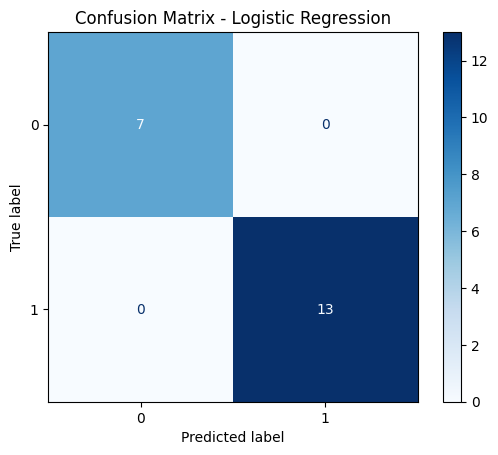

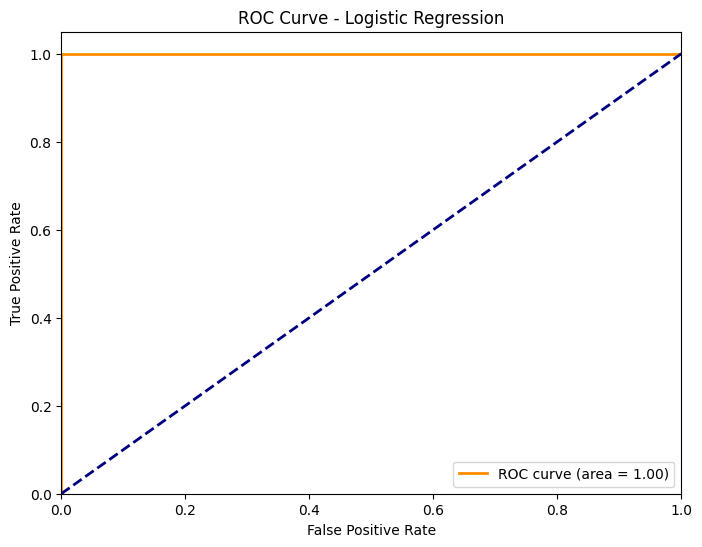

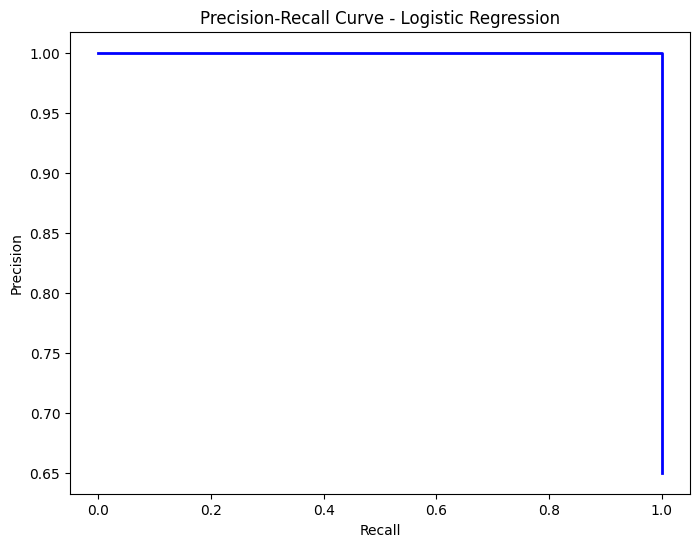

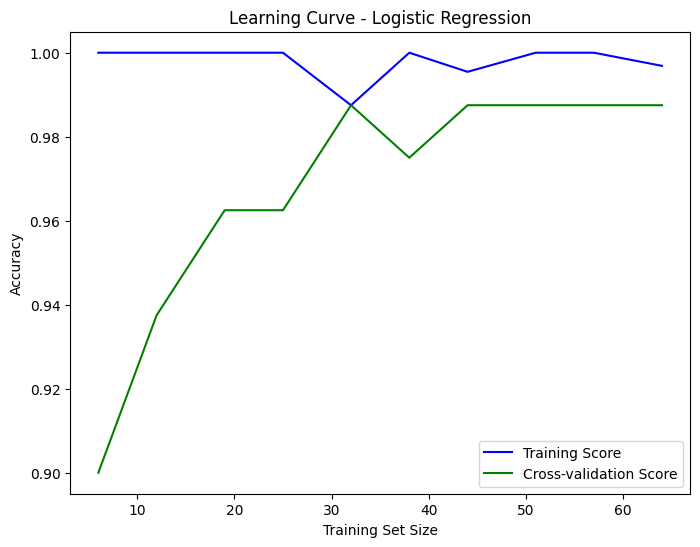

C:\Users\Parth Chhatrala\AppData\Local\Temp\ipykernel_9028\847432012.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


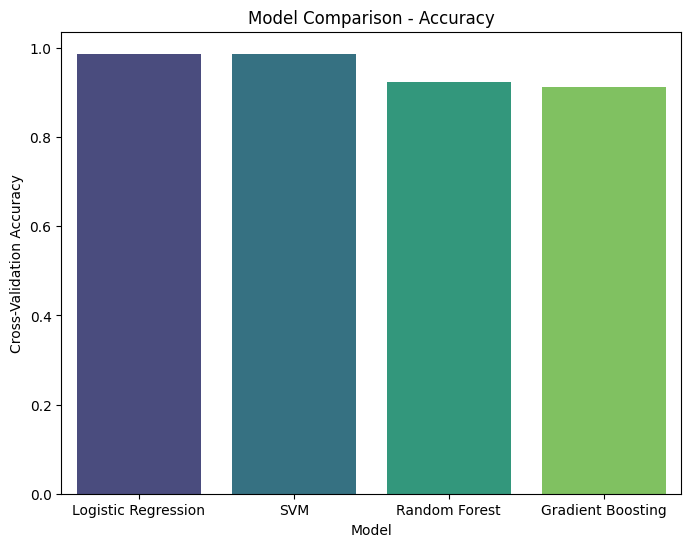

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred_prob, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()


from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), color='blue', label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), color='green', label='Cross-validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()


import seaborn as sns

def plot_model_comparison(models, model_results):
    model_names = list(models.keys())
    accuracies = [result['Best Cross-Val Score'] for result in model_results.values()]
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=model_names, y=accuracies, palette='viridis')
    plt.xlabel('Model')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title('Model Comparison - Accuracy')
    plt.show()

# For a specific model, e.g., Random Forest
best_model = model_results['Logistic Regression']['Best Model']
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC & Precision-Recall

# 1. Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, 'Logistic Regression')

# 2. Plot ROC Curve
plot_roc_curve(y_test, y_pred_prob, 'Logistic Regression')

# 3. Plot Precision-Recall Curve
plot_precision_recall_curve(y_test, y_pred_prob, 'Logistic Regression')

# 4. Plot Learning Curve
plot_learning_curve(best_model, X_train, y_train, 'Logistic Regression')


# 5. Plot Model Comparison (Accuracy Bar Plot)
plot_model_comparison(models,model_results)
